# TD4 Chemical Signalling, Quantitative Temporal Logic

## MAPK Signalling model

F. Fages, Mar. 2020, Feb 2021

- Quantitative temporal logic FOLTL(Rlin)
- Validity domains of FOLTL(Rlin) constraints
- Continuous satisfaction degree
- Robustness with respect to parameter variations
- Sensivitity to parameter values
- Parameter search

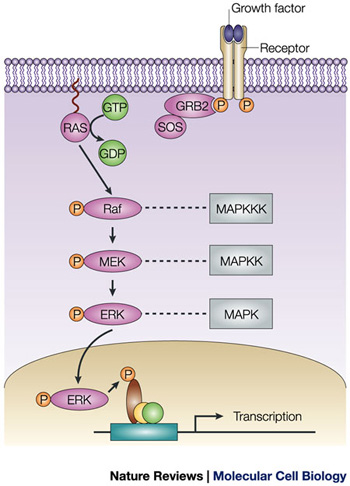

## Model 9 in BioModels 

after Huang CY, Ferrell JE Jr

Ultrasensitivity in the mitogen-activated protein kinase cascade.

Proc. Natl. Acad. Sci. U.S.A. 1996:93(19):10078-83

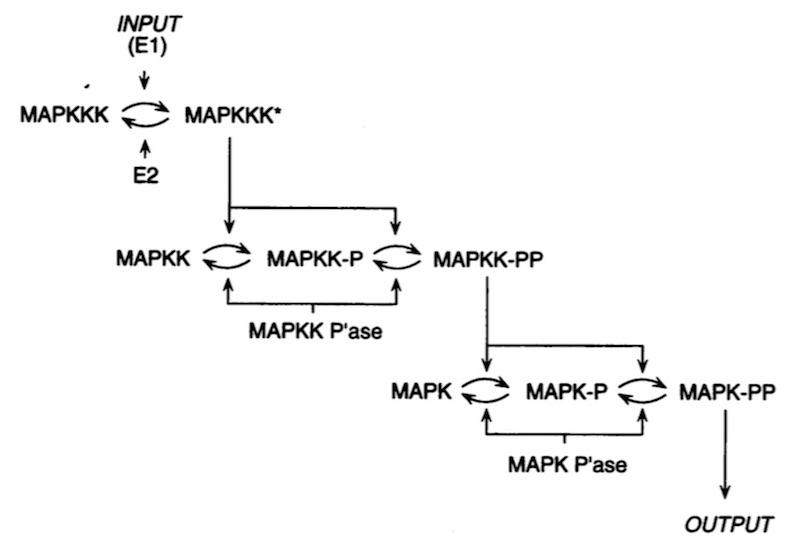

Model reduced here by removing decomplexation reactions 
* reduction preserving CTL specification (see TD3) 

In [1]:
load(BIOMD9renamedCTLreduced.bc).

In [2]:
list_model.

MA(a1) for E1+KKK=>E1_KKK.
MA(c1) for E1_KKK=>E1+KKKp.
MA(a2) for E2+KKKp=>E2_KKKp.
MA(c2) for E2_KKKp=>E2+KKK.
MA(a3) for KK+KKKp=>KKKp_KK.
MA(c3) for KKKp_KK=>KKKp+KKp.
MA(a4) for KKPase+KKp=>KKPase_KKp.
MA(c4) for KKPase_KKp=>KK+KKPase.
MA(a5) for KKKp+KKp=>KKKp_KKp.
MA(c5) for KKKp_KKp=>KKKp+KKpp.
MA(a6) for KKPase+KKpp=>KKPase_KKpp.
MA(c6) for KKPase_KKpp=>KKPase+KKp.
MA(a7) for K+KKpp=>KKpp_K.
MA(c7) for KKpp_K=>KKpp+Kp.
MA(a8) for KPase+Kp=>KPase_Kp.
MA(c8) for KPase_Kp=>K+KPase.
MA(a9) for KKpp+Kp=>KKpp_Kp.
MA(c9) for KKpp_Kp=>KKpp+Kpp.
MA(a10) for KPase+Kpp=>KPase_Kpp.
MA(c10) for KPase_Kpp=>KPase+Kp.
present(E1,3.0e-5).
present(E2,0.0003).
present(KKK,0.003).
present(KK,1.2).
present(K,1.2).
present(KPase,0.12).
present(KKPase,0.0003).
parameter(
  compartment = 4.0e-12,
  Kppnorm_max = 0.900049,
  a1 = 1000.0,
  c1 = 150.0,
  a2 = 1000.0,
  c2 = 150.0,
  a3 = 1000.0,
  c3 = 150.0,
  a4 = 1000.0,
  c4 = 150.0,
  a5 = 1000.0,
  c5 = 150.0,
  a6 = 1000.0,
  c6 = 150.0,
  a7 = 1

# Differential semantics
## Functions of time
* showing stabilization and signal amplification

In [3]:
option(time: 100).
numerical_simulation. 
plot.

## Input/output functions
* stiffer sigmoids on the 2nd and 3rd levels
* showing all-or-nothing switch at the 3rd level (output of the signaling network)
* acting as an analog-digital converter 

In [4]:
option(show: {KKKp, KKpp, Kpp}). 
dose_response(E1, 1e-7, 5e-5, time:1000).

## Trajectories toward output stabilization

In [5]:
numerical_simulation. 
plot.

# Querying a Trace in Quantitative Temporal Logic FO-LTL(Rlin)
* *First-Order Linear Time Logic* with free variables and *linear constraints* over the reals
* Real-valued states (concentrations of molecular species)
* Bounded model-checking: validity of LTL formulae on a finite trace (completed with a loop on the last state)
* FO-LTL(Rlin) constraint solving: validity domain for variables

### Validity domains of FOLTL(Rlin) constraint variables

In [6]:
validity_domain(F(Kpp = v)). % all values in the trace

v=0\/v=1.0e-6\/v=8.0e-6\/v=3.8e-5\/v=0.00014\/v=0.000432\/v=0.001212\/v=0.003238\/v=0.008665\/v=0.024576\/v=0.079033\/v=0.280503\/v=0.642303\/v=0.786039\/v=0.847385\/v=0.882236\/v=0.904679\/v=0.920253\/v=0.931613\/v=0.940199\/v=0.946863\/v=0.952142\/v=0.95639\/v=0.959851\/v=0.962698\/v=0.965057\/v=0.967019\/v=0.968655\/v=0.970018\/v=0.971151\/v=0.972085\/v=0.97285\/v=0.973467\/v=0.973959\/v=0.974343\/v=0.974636\/v=0.974854\/v=0.975011\/v=0.97512\/v=0.975189\/v=0.975229\/v=0.975246\/v=0.975245\/v=0.975232\/v=0.975211\/v=0.975183\/v=0.975152\/v=0.975119\/v=0.975086\/v=0.975053\/v=0.975021\/v=0.974992\/v=0.974965\/v=0.97494\/v=0.974917\/v=0.974897\/v=0.97488\/v=0.974865\/v=0.974852\/v=0.974841\/v=0.974832\/v=0.974824\/v=0.974818\/v=0.974814\/v=0.974802\/v=0.974803\/v=0.974804\/v=0.974805\/v=0.974806\/v=0.974807\/v=0.974808\/v=0.974809\/v=0.97481\/v=0.974811


In [7]:
validity_domain(F(G(Kpp = v))). % last value of Kpp on the trace (stable value)

v=0.974811


In [8]:
% times of last value
validity_domain(F(Time = t /\ G(Kpp = v))). 

t=93.2459/\v=0.974811\/t=94.2459/\v=0.974811\/t=95.2459/\v=0.974811\/t=96.2459/\v=0.974811\/t=97.2459/\v=0.974811\/t=98.2459/\v=0.974811\/t=99.2459/\v=0.974811\/t=100/\v=0.974811


In [9]:
% time bound for last value
validity_domain(F(Time <= t /\ G(Kpp = v))). 

t>=93.2459/\v=0.974811


In [10]:
% switching time
validity_domain(F(Time <= t /\ G(Kpp > 0.5))). 

t>=14.2459


### Satisfaction degree of FOLTL(Rlin) constraint with given objective values for the free variables
* satisfaction degree in [0,1] as the inverse of the distance between the objective point and the validity domain
* satisfaction degree in[1, +inf[ as the penetration depth of the objective point in the validity domain (i.e. formula robustness)

In [11]:
satisfaction_degree(F(Time < t /\ G(Kpp > 0.5)), [t->14.2459]).

1.000000


In [12]:
satisfaction_degree(F(Time < t /\ G(Kpp > 0.5)), [t->10]).

0.190625


In [13]:
satisfaction_degree(F(Time < t /\ G(Kpp > 0.5)), [t->20]).

6.754000


### Robustness of FOLTL(Rlin) constraint with given objective values for the free variables and parameter variation coefficient
* Here robustness of the switching time property with respect to variation of the input concentration
* Default coefficient of variation is 0.1 (i.e. variation of parameter values by 10%)

In [14]:
present(E1, e1).
parameter(e1=3e-5).

In [15]:
seed(0).
robustness(F(Time < t /\ G(Kpp > 0.5)), [e1], [t-> 14.2459]).

Time: 4.019 s
Robustness degree: 0.816668


In [16]:
seed(0).
robustness(F(Time < t /\ G(Kpp > 0.5)), [e1], [t-> 14.2459], robustness_coeff_var: 0.2).

Time: 3.424 s
Robustness degree: 0.727501


In [17]:
seed(0).
robustness(F(Time < t /\ G(Kpp > 0.5)), [e1], [t-> 14.2459], robustness_coeff_var: 0.3).

Time: 3.35 s
Robustness degree: 0.695834


In [18]:
% robustness w.r.t. variation of kinetic parameters by 10%
seed(0).
robustness(F(Time < t /\ G(Kpp > 0.5)), [a1, c1, a2, c2], [t-> 14.2459]).

Time: 3.453 s
Robustness degree: 0.769043


### Parameter search for satisfying an FOLTL(Rlin) constraint with given objective values for the variables
* Explores the search space with a continuous opitmization algorithm with satisfaction degree as objective function
* BIOCHAM uses CMAES (covariance matrix adaptive evolution strategy) 

#### E.g. find kinetic parameters a1, c1, a2, c2 for having a switching time before 10

In [19]:
load(BIOMD9renamedCTLreduced.bc).

In [20]:
seed(0).
search_parameters(F(Time < t /\ G(Kpp > 0.5)), 
    [10<=a1<=1e4, 10<=c1<=1e4, 10<=a2<=1e4, 10<=c2<=1e4], 
    [t-> 10]).

  Time: 3.08 s
Stopping reason: Fitness: function value -8.24e-01 <= stopFitness (1.00e-04)
Best satisfaction degree: 5.68065
[0] parameter(a1=7674.210850413254)
[1] parameter(c1=5374.014748948604)
[2] parameter(a2=2795.4498499859355)
[3] parameter(c2=667.8684933333466)


In [21]:
numerical_simulation. plot.

In [22]:
% switching time
validity_domain(F(Time <= t /\ G(Kpp > 0.5))). 

t>=5.31933


In [23]:
dose_response(E1, 1e-7, 5e-5, time:1000).

## Question 8) Find the critical value of input E1 to get an output concentration of Kpp=0.5
* as shown by the dose-response diagram there is one value of e1 for reaching that stable state 0.5
* determine that value by search_parameters

## Question 9) Evaluate the robustness of that threshold value for E1 

## Question 10) Determine to which kinetic parameters and initial concentrations that critical value for E1 is most sensitive